# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finananal  as finan

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

from tensorflow.keras import layers

import pickle

from sklearn.externals import joblib 

/home/marcelo/anaconda3/envs/jupyter/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Tensorflow and notebook prep.

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
pd.options.display.max_columns = None

# Reading the files

In [4]:
sp500 = pd.read_pickle(r'multiplexed/X_1604_1closech.pkl')

In [5]:
y = pd.read_pickle(r'multiplexed/y_1604_1closech.pkl')

# Normalization

In [6]:
y_norm = (y - y.min()) / (y.max() - y.min())
y_norm = y

In [7]:
y_norm[6046:6051]

Date
2012-03-06   -20.969971
2012-03-07     9.270020
2012-03-08    13.280029
2012-03-09     4.959961
2012-03-12     0.219971
Freq: B, Name: Close Change, dtype: float64

In [8]:
%%time

X_norm = finan.full_data_norm(sp500)

CPU times: user 1min 54s, sys: 614 ms, total: 1min 55s
Wall time: 1min 55s


In [9]:
array_data_sp500 = []
for data in X_norm:
    array_data_sp500.append(data.values)
array_data_sp500 = np.array(array_data_sp500)

In [10]:
array_data_sp500.shape

(8094, 43, 41)

In [11]:
type(array_data_sp500)

numpy.ndarray

# Saving the normalized data

In [12]:
# f = open("normalized/X_norm_2004_1closech.pkl","wb")
# pickle.dump(array_data_sp500,f)
# f.close()

In [13]:
# f = open("normalized/y_norm_2004_1closech-notnorm.pkl","wb")
# pickle.dump(y_norm,f)
# f.close()

In [14]:
y_norm.index[12]

Timestamp('1989-01-18 00:00:00', freq='B')

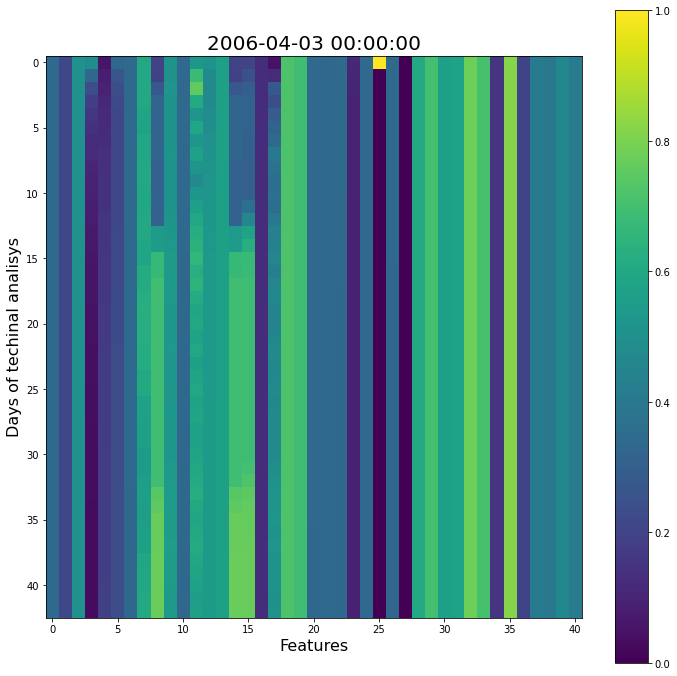

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(X_norm[4500])
plt.title(y_norm.index[4500], fontsize =20)
plt.xlabel('Features', fontsize= 16)
plt.ylabel('Days of techinal analisys', fontsize= 16)
plt.colorbar()
plt.show()